In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.1.0
TFP version: 0.9.0


In [2]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

# Tensorflow Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [3]:
# Create a normal distribution from Tensorflow Distributions
NormalObs = tfd.Normal(loc = 0., scale = 1.)
print(NormalObs)


tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


In [6]:
# Sample from the chosen distribution...
NormalObs.sample()


<tf.Tensor: shape=(), dtype=float32, numpy=0.33875433>

In [8]:
# ... or sample multiple times
NormalObs.sample(15)



<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([-0.6383433 , -1.1492779 , -0.8656427 , -1.3332063 , -0.82325643,
       -0.7619269 ,  0.4257505 ,  2.8928344 , -0.34264988, -1.7522513 ,
       -0.17786829, -0.943825  ,  0.11156012,  0.8074948 , -0.32381943],
      dtype=float32)>

In [11]:
# Obtain value of probability's density

NormalObs.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [14]:
# Obtain value of logprobability
NormalObs.log_prob(0.)


<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [16]:
# Verify that this really is the log of the probability
np.log(NormalObs.prob(0))


-0.9189385

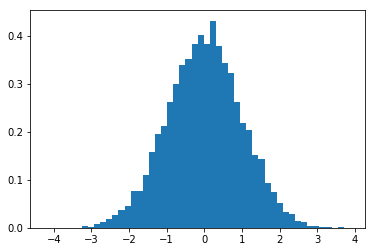

In [18]:
# Plot a histogram, approximating the density

plt.hist(NormalObs.sample(10000), bins=50, density=True)
plt.show()

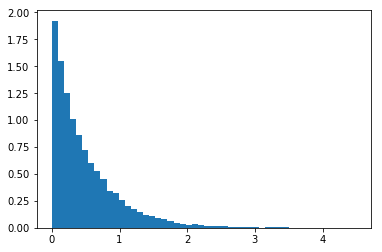

In [21]:
# Do the same for the exponential distribution
Exponential = tfd.Exponential(rate=2)
plt.hist(Exponential.sample(10000),bins = 50,density=True)
plt.show()


In [22]:
# Sample as before
Exponential.sample(10)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.00360762, 0.08092886, 1.1103257 , 0.1339663 , 1.0207587 ,
       0.46859097, 0.25207508, 0.41979963, 0.05535272, 0.15255775],
      dtype=float32)>

In [24]:
# Create a Bernoulli distribution (discrete)
bernoulli = tfd.Bernoulli(probs=0.9)
bernoulli.sample(15)


<tf.Tensor: shape=(15,), dtype=int32, numpy=array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)>

#### A word of caution on discrete distributions

In [26]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(bernoulli.prob(k),k))

prob result 0.10000002384185791 for k = 0 
prob result 0.30000004172325134 for k = 0.5 
prob result 0.8999999761581421 for k = 1 
prob result 0.011111116036772728 for k = -1 


In [27]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_success, k):
    return np.power(p_success,k)*np.power((1-p_success),(1-k))

In [29]:
# Evaluate it as before

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(my_bernoulli(p_success=0.9,k = k),k))

prob result 0.09999999999999998 for k = 0 
prob result 0.29999999999999993 for k = 0.5 
prob result 0.9 for k = 1 
prob result 0.011111111111111106 for k = -1 


#### Work with batch distributions

In [30]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [40]:
# Sample from it, noting the shape

bernoulli_batch.sample(10,5)

<tf.Tensor: shape=(10, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 1, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1]], dtype=int32)>

In [41]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [43]:
# Sample from this batch of distributions

bernoulli_batch_2D.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [0, 1]]],


       [[[1, 1],
         [1, 0],
         [1, 1]]],


       [[[1, 1],
         [1, 1],
         [0, 1]]],


       [[[0, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 1],
         [1, 0],
         [0, 0]]]], dtype=int32)>

In [44]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Basic multivariate distributions

In [20]:
# Define 2D multivariate Gaussian with diagonal covariance matrix
normal_diag = tfd.MultivariateNormalDiag(loc=[0, 1], scale_diag=[1, 5])
normal_diag


<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [21]:
# Sample from it
normal_diag.sample(10)


<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-0.8980837 , -8.129572  ],
       [-0.44441807, -6.4414735 ],
       [-0.7855463 ,  1.9809828 ],
       [ 0.17604655, -6.6262527 ],
       [ 0.635294  ,  4.340602  ],
       [ 1.4230527 ,  1.2280822 ],
       [-0.21692705, -7.542453  ],
       [ 0.5174161 ,  0.40138412],
       [-1.0614088 , -1.7045629 ],
       [ 0.08606925, -5.390967  ]], dtype=float32)>

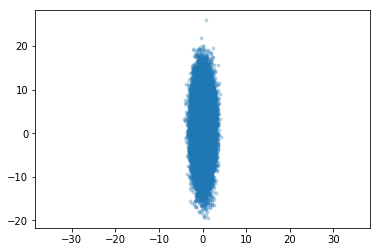

In [22]:
# Make a plot
sampled = normal_diag.sample(100000)
plt.scatter(sampled[:,0], sampled[:,1] ,marker=".",alpha = 0.25)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions

In [23]:
# Create three "batches" of multivariate normals
normal_diag_batch = tfd.MultivariateNormalDiag(loc=[[0, 0],[0, 0],[0, 0]],
                                              scale_diag = [[1, 2],[2, 1],[2, 2]])
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [16]:
# Sample from it
print(normal_diag_batch.sample(10))
print(normal_diag_batch.sample(100).shape)
samples = normal_diag_batch.sample(10)

tf.Tensor(
[[[-1.1651201  -0.64370716]
  [ 0.84133923 -1.8989996 ]
  [ 0.7882074  -0.04263435]]

 [[-0.23954919  0.04739967]
  [ 5.0235534  -0.523273  ]
  [ 0.1941957   1.6896133 ]]

 [[ 0.26128542  0.76616985]
  [ 1.2752818   0.5395389 ]
  [-0.69422597 -0.5495769 ]]

 [[ 1.809224   -2.3915994 ]
  [-2.06593    -0.9546215 ]
  [ 2.7072544  -0.01366107]]

 [[ 1.1137108  -1.4365606 ]
  [ 0.5901614  -1.0590994 ]
  [-1.0582151  -1.8864738 ]]

 [[-0.3673988  -1.666179  ]
  [-0.94023824  1.2986014 ]
  [-1.6943407   2.1464276 ]]

 [[ 0.67590404 -3.996738  ]
  [-1.0937513   0.33820015]
  [-1.7119789  -0.9732161 ]]

 [[-0.370577   -0.16658142]
  [-0.37639195 -0.44537318]
  [ 0.60017055  1.5922533 ]]

 [[-1.5546014   1.0365412 ]
  [-1.0523992  -0.02682833]
  [-2.9548607  -0.60771376]]

 [[-0.13966198  1.5874065 ]
  [-1.4210953  -1.3106531 ]
  [ 0.7442453   2.6861084 ]]], shape=(10, 3, 2), dtype=float32)
(100, 3, 2)


In [24]:
# Compute log probs
normal_diag_batch.log_prob(samples)


<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[-2.6901767, -3.1306713, -3.7915902],
       [-2.708254 , -3.902944 , -3.487253 ],
       [-3.6510005, -3.4003782, -6.841311 ],
       [-2.943499 , -2.839795 , -4.972805 ],
       [-2.7215028, -2.8772721, -6.299121 ],
       [-3.2998576, -3.9285214, -5.0637465],
       [-3.1385674, -3.4828758, -3.5306478],
       [-2.7556927, -3.4830956, -5.227889 ],
       [-3.4992597, -3.2327642, -3.2328923],
       [-3.5831077, -3.0833588, -4.5966997]], dtype=float32)>

In [31]:
# Create a sample for a plot -- notice the shape
plt_sample_batch = normal_diag_batch.sample(1000)
print(plt_sample_batch.shape)
print(plt_sample_batch[:,0,:])

(1000, 3, 2)
tf.Tensor(
[[-0.0969347   0.14190346]
 [ 0.4167602  -1.8271412 ]
 [ 0.34725377  3.123134  ]
 ...
 [-1.3268107  -2.5955014 ]
 [-0.27985674 -2.3100805 ]
 [ 0.8858361  -0.6431356 ]], shape=(1000, 2), dtype=float32)


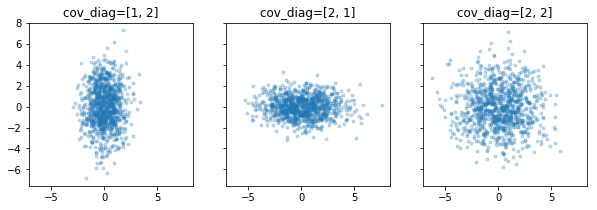

In [35]:
# Plot samples from the batched multivariate Gaussian
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,3))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']
for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:, i, :]
    ax.scatter(samples[:,0], samples[:,1], marker = ".", alpha=0.25)
    ax.set_title(title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

In [62]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components
mean = [-1., 1]
std = [0.5, 1.]

batch_of_normal = tfd.Normal(loc=mean, scale=std)
print(batch_of_normal.sample(10).shape)
print(batch_of_normal.sample(10))


(10, 2)
tf.Tensor(
[[-0.83062285  1.3449861 ]
 [-1.3302892   0.7145006 ]
 [-0.78073806  1.8288566 ]
 [-1.2679578   0.4646517 ]
 [-1.5162125  -1.9427049 ]
 [-0.8850255   0.45379573]
 [-1.148698    1.0165684 ]
 [-0.9203568   0.56035423]
 [-0.3778327   0.16135609]
 [-1.2106748   1.0730213 ]], shape=(10, 2), dtype=float32)


In [63]:
loh= np.linspace(2,3,10)
print(loh)
(np.repeat(loh[:,np.newaxis],repeats=2,axis = 1))

[2.         2.11111111 2.22222222 2.33333333 2.44444444 2.55555556
 2.66666667 2.77777778 2.88888889 3.        ]


array([[2.        , 2.        ],
       [2.11111111, 2.11111111],
       [2.22222222, 2.22222222],
       [2.33333333, 2.33333333],
       [2.44444444, 2.44444444],
       [2.55555556, 2.55555556],
       [2.66666667, 2.66666667],
       [2.77777778, 2.77777778],
       [2.88888889, 2.88888889],
       [3.        , 3.        ]])

In [64]:
batch_of_normal.prob([[4,2],[2,2]])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.5389188e-22, 2.4197073e-01],
       [1.2151759e-08, 2.4197073e-01]], dtype=float32)>

In [65]:
batch_of_normal.prob(np.repeat(loh[:,np.newaxis],repeats=2,axis = 1))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[1.2151759e-08, 2.4197073e-01],
       [3.1250469e-09, 2.1519247e-01],
       [7.6493811e-10, 1.8902948e-01],
       [1.7821805e-10, 1.6401011e-01],
       [3.9521060e-11, 1.4055614e-01],
       [8.3417943e-12, 1.1897818e-01],
       [1.6758825e-12, 9.9477135e-02],
       [3.2046574e-13, 8.2151920e-02],
       [5.8327427e-14, 6.7011639e-02],
       [1.0104536e-14, 5.3990960e-02]], dtype=float32)>

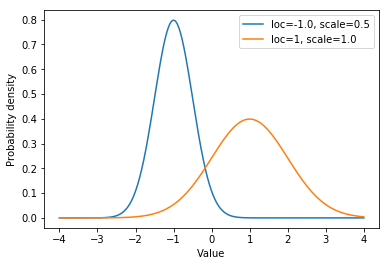

In [66]:
# Univariate density functions
import seaborn as sns
t = np.linspace(-4, 4, 10000)
densities = batch_of_normal.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(mean[0], std[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(mean[1], std[1]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [67]:
# Check their batch_shape and event_shape

batch_of_normal

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [69]:
# Use Independent to convert the batch shape to the event shape

bivariate_normal_from_independent = tfd.Independent(batch_of_normal,reinterpreted_batch_ndims=1)
bivariate_normal_from_independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [70]:
# Note that dimension from batch_shape has shifted to event_shape

bivariate_normal_from_independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

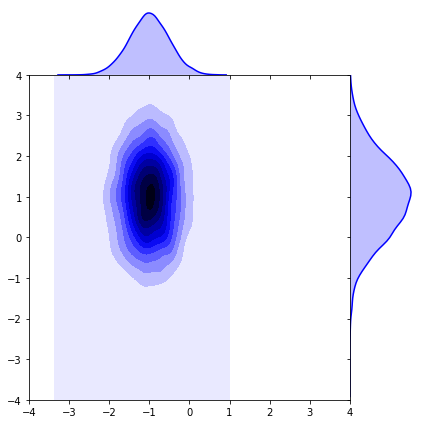

In [72]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

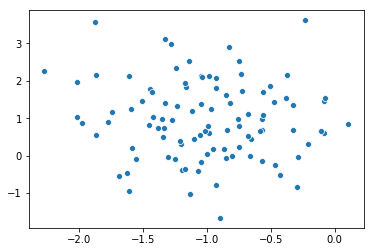

In [75]:
sns.scatterplot(x1[:100],x2[:100])

In [76]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)
bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc = mean, scale_diag=std)
bivariate_normal_from_Multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

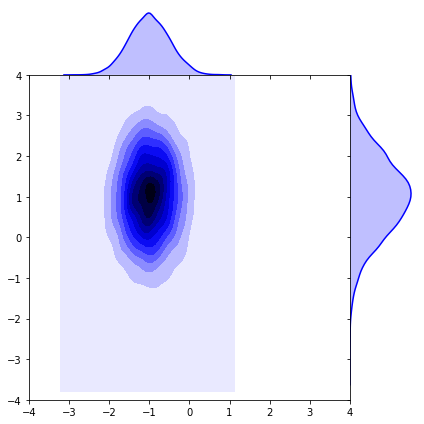

In [77]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_Multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [78]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)
normals_batch_3by2_event_1

<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [79]:
# Highlight batch_shape

normals_batch_3by2_event_1.batch_shape

TensorShape([3, 2])

In [80]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid

normals_batch_3by2_event_2 = tfd.Independent(normals_batch_3by2_event_1,reinterpreted_batch_ndims=1)
normals_batch_3by2_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [81]:
# Evaluate log_prob

normals_batch_3by2_event_2.log_prob([[-10, 10],
                                    [100, 100],
                                    [1., 1.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.1146406e+03, -4.1404624e+00, -2.8378770e+00], dtype=float32)>

In [85]:
import pandas as pd

In [107]:
# Can reinterpret _all_ batch dimensions as event dimensions
AllIn = tfd.Independent(normals_batch_3by2_event_1,reinterpreted_batch_ndims=2)
AllIn.sample(10).shape
x1 = AllIn.sample(10)[:,0,:].numpy()
x2 = AllIn.sample(10)[:,1,:].numpy()

df1 = pd.DataFrame(data=x1,columns=["Lohhh","Aingg"])
df2 = pd.DataFrame(data=x2,columns=["Sampis","inijuga"])
concatenate = pd.concat([df1,df2],axis = 1)
concatenate.head()

,Lohhh,Aingg,Sampis,inijuga
0,-100.080460,-92.138420,100.114296,91.388672
1,-98.095947,-88.621567,99.909286,104.446045
2,-98.657578,-106.483047,101.717766,95.928345
3,-100.702438,-96.370567,101.315331,111.677399
4,-101.055763,-106.368149,101.584030,92.948982


In [109]:
# Take log_probs 

AllIn.log_prob([[1.0, 2.0],
                 [0.2, 1.4],
                 [0.2, 0.1]])

<tf.Tensor: shape=(), dtype=float32, numpy=-10191.293>

#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

In [3]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
# Get the train data


newsgroups_data = fetch_20newsgroups(data_home="20_Newsgroup_Data/",subset="train")
newsgroups_data.keys()

dict_keys(['target', 'filenames', 'DESCR', 'data', 'target_names'])

In [5]:
# More information about the data set
    
newsgroups_data["DESCR"]

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total            

In [6]:
# Example article
newsgroups_data["data"][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [7]:
# Associated label
newsgroups_data["target"][0]


7

In [8]:
# Name of label
newsgroups_data['target_names'][7]


'rec.autos'

In [126]:
1.01 / len(newsgroups_data["data"])

8.926993105886513e-05

In [9]:
# Preprocessing boilerplate

n_documents = len(newsgroups_data['data'])

count_vectorizer = CountVectorizer(input='content', binary=True,
                                   max_df=0.35, min_df=1.01/n_documents) # ignore common words, words that appear once
binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_data['data']) # input is a list of strings
binary_bag_of_words

<11314x56386 sparse matrix of type '<class 'numpy.int64'>'
	with 1390461 stored elements in Compressed Sparse Row format>

In [10]:
# Check shape
binary_bag_of_words.shape


(11314, 56386)

In [11]:
# Check that the fit has been successful
count_vectorizer.inverse_transform(binary_bag_of_words[0,:])


[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone', 'out',
        'could', 'enlighten', 'me', 'saw', 'other', 'day', 'door',
        'sports', 'looked', 'late', '60s', 'early', '70s', 'called',
        'bricklin', 'doors', 'were', 'really', 'small', 'addition',
        'front', 'bumper', 'separate', 'rest', 'body', 'know', 'tellme',
        'model', 'name', 'engine', 'specs', 'years', 'production', 'made',
        'history', 'whatever', 'info', 'funky', 'looking', 'please',
        'mail', 'thanks', 'il', 'brought', 'your', 'neighborhood'],
       dtype='<U80')]

In [13]:
# Dict that will be useful later 

inv_vocabulary = {value:key for key, value in count_vectorizer.vocabulary_.items()}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$. 

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [25]:
sampis = np.repeat([5,2],10,axis =0)
sampis == 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [24]:
np.zeros(shape=[2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [27]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)

n_classes = newsgroups_data['target'].max() + 1
y = newsgroups_data['target']
n_words = binary_bag_of_words.shape[1]

alpha = 1e-6 # parameters for Laplace smoothing

"""theta = np.zeros(shape=(n_classes, n_words))
for kelas in range(n_classes):
    cek_kelas = (y == kelas)
    Totkelas = cek_kelas.sum()
    theta[kelas,:] = (binary_bag_of_words[cek_kelas, :].sum(axis=0) + alpha) / (Totkelas + alpha*2)
"""                 
theta = np.zeros(shape = (n_classes, n_words)) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    theta[c_k, :] = (binary_bag_of_words[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

In [35]:
mostWordGan = theta.argmax(axis=1)
for j, ix in enumerate(mostWordGan):
    print(f"Most probable Word in class {newsgroups_data['target_names'][j]} is {inv_vocabulary[ix]}")

Most probable Word in class alt.atheism is your
Most probable Word in class comp.graphics is graphics
Most probable Word in class comp.os.ms-windows.misc is windows
Most probable Word in class comp.sys.ibm.pc.hardware is has
Most probable Word in class comp.sys.mac.hardware is mac
Most probable Word in class comp.windows.x is get
Most probable Word in class misc.forsale is sale
Most probable Word in class rec.autos is car
Most probable Word in class rec.motorcycles is dod
Most probable Word in class rec.sport.baseball is he
Most probable Word in class rec.sport.hockey is ca
Most probable Word in class sci.crypt is clipper
Most probable Word in class sci.electronics is use
Most probable Word in class sci.med is has
Most probable Word in class sci.space is space
Most probable Word in class soc.religion.christian is who
Most probable Word in class talk.politics.guns is no
Most probable Word in class talk.politics.mideast is who
Most probable Word in class talk.politics.misc is we
Most pro

In [36]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(newsgroups_data['target_names'][j],
                                                           inv_vocabulary[ix]))

Most probable word in class alt.atheism is "your".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "has".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "get".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "has".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "who".
Most probable word in class talk.politics.guns is "no".
Most probable word in class talk.politics.mideast is "who".
Most pr

In [45]:
theta[0]

array([6.25000206e-03, 2.29166687e-02, 2.08333332e-09, ...,
       2.08333332e-09, 2.08333332e-09, 2.08333332e-09])

In [41]:
# Define a distribution for each class
batch_of_bernoulli = tfd.Bernoulli(probs=theta)
p_x_given_y = tfd.Independent(batch_of_bernoulli,reinterpreted_batch_ndims=1)
p_x_given_y


<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56386] dtype=int32>

In [58]:
# Take a sample of words from each class

n_samples = 10
sample = p_x_given_y.sample(n_samples)
sample.shape

TensorShape([10, 20, 56386])

In [81]:
sample[9].numpy().shape

(20, 56386)

In [44]:
# Choose a class

chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [91]:
newsgroups_data["target"].shape

(11314,)

In [94]:
count_vectorizer

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.35, max_features=None,
        min_df=8.926993105886513e-05, ngram_range=(1, 1),
        preprocessor=None, stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [89]:
n_samples = 1
nyoba = p_x_given_y.sample(n_samples)
nyoba.shape
count_vectorizer.inverse_transform(nyoba[:,12,:])

[array(['12v', '18', '185326', '250k', '29', 'activity', 'am', 'amd',
        'anybody', 'arbitrary', 'big', 'bu', 'bull', 'bus', 'cab', 'cheap',
        'commonly', 'connection', 'couple', 'dangerous', 'dept',
        'detection', 'doesn', 'dont', 'dual', 'eg', 'engineering',
        'factor', 'fitting', 'following', 'gateway', 'get', 'gotten',
        'grn', 'had', 'hand', 'hanrahan', 'having', 'heat', 'higher',
        'hodge', 'however', 'inc', 'key', 'less', 'like', 'look', 'ma',
        'maintain', 'memory', 'metal', 'michael', 'microcontrollers',
        'more', 'near', 'netnews', 'now', 'nuntius', 'obscure', 'operates',
        'other', 'please', 'properly', 'pumped', 'rate', 'rather',
        'really', 'regulation', 'safer', 'scientist', 'signal',
        'situation', 'some', 'steel', 'stronger', 'take', 'telephone',
        'than', 'thanks', 'them', 'these', 'think', 'time', 'two', 'type',
        'uncecs', 'up', 'using', 'version', 'via', 'zero'], dtype='<U80')]

In [99]:

count_vectorizer.inverse_transform(theta[19,:])[0].shape

(56386,)

In [ ]:
n_samples = 1000
sample = p_x_given_y.sample(n_samples)
sample.shape

In [104]:
# Indicators for words that appear in the sample

class_sample = sample[:, 12, :]
class_sample

<tf.Tensor: shape=(90, 56386), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)>

In [49]:
# Perform inverse transform to test quality of fit

count_vectorizer.inverse_transform(class_sample)

[array(['12', '128', '14', '27', '41', '706', '7415', 'accounts',
        'acknowledge', 'after', 'am', 'andrew', 'au', 'basis', 'behalf',
        'behind', 'being', 'belief', 'belong', 'bgu', 'bible', 'both',
        'brain', 'brings', 'causes', 'christ', 'claim', 'class', 'college',
        'combined', 'come', 'concerned', 'context', 'dale', 'db7n',
        'definite', 'deletions', 'department', 'dictate', 'didn', 'does',
        'doesn', 'domestic', 'don', 'double', 'during', 'elect', 'equally',
        'eternity', 'etymology', 'everyone', 'evils', 'example',
        'expectation', 'express', 'expresses', 'fact', 'find', 'first',
        'formlulating', 'fulfill', 'generation', 'god', 'had', 'has',
        'heaven', 'hello', 'help', 'here', 'his', 'hold', 'individuality',
        'inductive', 'into', 'issue', 'jeesus', 'joel', 'joseph', 'just',
        'kicked', 'language', 'late', 'least', 'light', 'll', 'mar',
        'masses', 'may', 'means', 'might', 'ministry', 'mlsma', 'moment

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [ ]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                 scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

In [ ]:
# Sample



In [ ]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
        [[2., 2.3, 8], [1.4, 1, 1.3]]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

In [ ]:
# Use independent to move part of the batch shape



In [ ]:
# Draw some samples



In [ ]:
# `[B, E]` shaped input



In [ ]:
# `[E]` shaped input (broadcasting over batch size)



In [ ]:
#`[S, B, E]` shaped input (broadcasting over samples)



In [ ]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]



#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):
    
    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents)
    
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])

In [ ]:
# Defining a function to conduct Laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [ ]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [ ]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# Run the function 



In [ ]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.



In [ ]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob



#### Computing log_probs

In [ ]:
# Predicting one example from our test data



In [ ]:
# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis =-1)
print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

In [ ]:
# Make a Bernoulli Naive Bayes classifier using sklearn with the same level of alpha smoothing. 

clf = BernoulliNB(alpha=1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))

***
<a id='trainable_distributions'></a>
## Trainable Distributions

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
# Define an exponential distribution



In [ ]:
# Plot

plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [ ]:
# Define an exponential distribution with a trainable rate parameter



In [ ]:
# Define the negative log likelihood



In [ ]:
# Define a function to compute the loss and gradients



In [ ]:
# Optimize

def exponential_dist_optimisation(data, distribution):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

    num_steps = 10

    for i in range(num_steps):
        
        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format())
        
    return train_loss_results, train_rate_results

In [ ]:
# Get some data and train



In [ ]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate: ", exact_value)
print("Pred rate:  ", pred_value)

In [ ]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [ ]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data']) 
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [ ]:
# Defining a function to conduct laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [ ]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs) # shape (n_classes, n_words)
    dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
    return dist

In [ ]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [ ]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high =0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0,nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0,100):
            

    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print(dist)

    return dist


In [ ]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

In [ ]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data, labels=train_labels, nb_classes=4)

In [ ]:
# Compare the two results

for dist in [GT_dist,tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))